Subiendo imagen desde el equipo...


Saving IMAGEN PAJAROS.jpg to IMAGEN PAJAROS.jpg
Imagen 'IMAGEN PAJAROS.jpg' renombrada a 'imagen.jpg'.


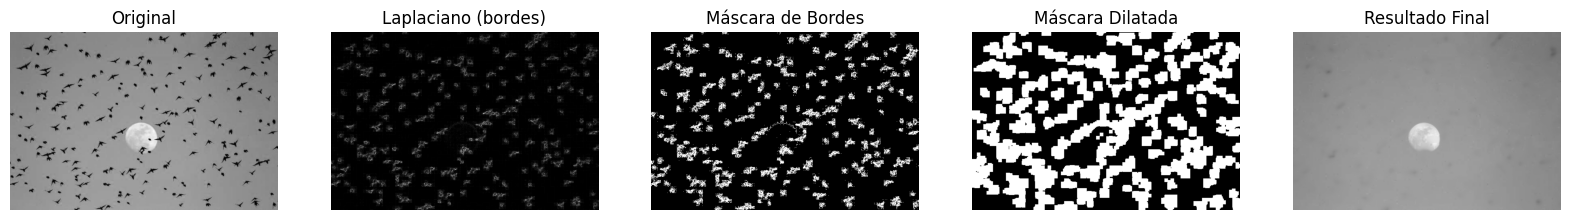

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# 1. Subir imagen
print("Subiendo imagen desde el equipo...")
uploaded = files.upload()
original_filename = next(iter(uploaded))
os.rename(original_filename, "imagen.jpg")
print(f"Imagen '{original_filename}' renombrada a 'imagen.jpg'.")

# 2. Cargar imagen
imagen = cv2.imread("imagen.jpg")
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# 3. Convertir a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# 4. Aplicar Laplaciano para detección de bordes
laplaciano = cv2.Laplacian(gris, cv2.CV_64F)
laplaciano = np.uint8(np.absolute(laplaciano))

# 5. Umbral para aislar bordes fuertes (pájaros)
_, mascara_bordes = cv2.threshold(laplaciano, 20, 255, cv2.THRESH_BINARY)

# 6. Dilatar para agrandar los pájaros
kernel = np.ones((5,5), np.uint8)
mascara_bordes_dilatada = cv2.dilate(mascara_bordes, kernel, iterations=2)

# 7. Crear fondo suavizado
suavizado = cv2.medianBlur(gris, 21)

# 8. Reemplazar áreas de pájaros con fondo suavizado
resultado = np.where(mascara_bordes_dilatada==255, suavizado, gris)

# 9. Convertir para visualizar
resultado_rgb = cv2.merge([resultado, resultado, resultado])

# 10. Mostrar resultados
plt.figure(figsize=(20,8))

plt.subplot(1,5,1)
plt.title('Original')
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(1,5,2)
plt.title('Laplaciano (bordes)')
plt.imshow(laplaciano, cmap='gray')
plt.axis('off')

plt.subplot(1,5,3)
plt.title('Máscara de Bordes')
plt.imshow(mascara_bordes, cmap='gray')
plt.axis('off')

plt.subplot(1,5,4)
plt.title('Máscara Dilatada')
plt.imshow(mascara_bordes_dilatada, cmap='gray')
plt.axis('off')

plt.subplot(1,5,5)
plt.title('Resultado Final')
plt.imshow(resultado_rgb)
plt.axis('off')

plt.show()
